**DECISION TREES ALOGIRITHM**

In [ ]:
# load liabraries

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz,plot_tree
from IPython.display import Image

In [ ]:
df=pd.read_csv("/content/demodt.txt")
print(df)

   State  Literacy  Cleanliness  Crime_Rate  Good
0      A        92           90          54     0
1      B        56           67          50     1
2      C        78           85          62     0
3      D        63           72          48     1
4      E        85           79          55     0
5      F        71           68          58     0
6      G        80           83          51     0
7      H        67           74          47     1
8      I        89           88          53     0
9      J        58           65          49     1
10     K        82           81          60     0
11     L        75           78          57     0
12     M        69           70          46     1
13     N        87           86          52     0
14     O        61           63          45     1
15     P        93           91          56     0
16     Q        55           66          61     0
17     R        76           77          59     0
18     S        84           82          44     1


In [6]:
feature_cols=['Literacy','Cleanliness','Crime_Rate']
feature=df[feature_cols]       # features
target=df.Good                 #target

In [9]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(feature,target)

DecisionTreeClassifier()

In [12]:
p=model.predict([[45,66,58]])
print(p)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [17]:
l=int(input("enter literacy rate in your city :"))
clean=int(input("enter cleanliness rate in your city :"))
c=int(input("enter crime rate in your city :"))
p=model.predict([[l,clean,c]])
print(p)
if p==1:
  print("good city")
else:
  print("bad city")

enter literacy rate in your city :45
enter cleanliness rate in your city :66
enter crime rate in your city :58
[0]
bad city


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[Text(0.5, 0.75, 'x[2] <= 50.5\ngini = 0.488\nsamples = 26\nvalue = [15, 11]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]')]

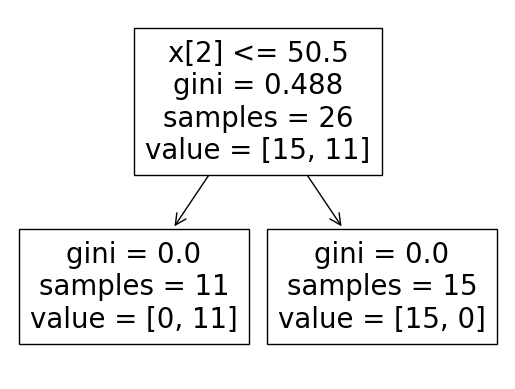

In [18]:
plot_tree(model)   #plot_tree(trained model name)

In [19]:
from sklearn.tree import export_graphviz,plot_tree

**RANDOM FOREST ALGORITHM**

In [21]:
#RANDOM FOREST TREE

# loading libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [22]:

df=pd.read_csv("/content/demodt.txt")
print(df)

   State  Literacy  Cleanliness  Crime_Rate  Good
0      A        92           90          54     0
1      B        56           67          50     1
2      C        78           85          62     0
3      D        63           72          48     1
4      E        85           79          55     0
5      F        71           68          58     0
6      G        80           83          51     0
7      H        67           74          47     1
8      I        89           88          53     0
9      J        58           65          49     1
10     K        82           81          60     0
11     L        75           78          57     0
12     M        69           70          46     1
13     N        87           86          52     0
14     O        61           63          45     1
15     P        93           91          56     0
16     Q        55           66          61     0
17     R        76           77          59     0
18     S        84           82          44     1


In [23]:
feature_cols=['Literacy','Cleanliness','Crime_Rate']
feature=df[feature_cols]       # features
target=df.Good                 #target


In [25]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10) # 100 by default
model.fit(feature,target)

RandomForestClassifier(n_estimators=10)

In [26]:
l=int(input("enter literacy rate in your city :"))
clean=int(input("enter cleanliness rate in your city :"))
c=int(input("enter crime rate in your city :"))
p=model.predict([[l,clean,c]])
print(p)
if p==1:
  print("good city")
else:
  print("bad city")

enter literacy rate in your city :34
enter cleanliness rate in your city :55
enter crime rate in your city :67
[0]
bad city


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [30]:
# saving all decision trees
import os
output_dir="tree_visualizations"
os.makedirs(output_dir,exist_ok=True)

In [31]:
for i, tree in enumerate(model.estimators_):               #enumerate(model_name.estimators_)
  tree_dot_file=os.path.join(output_dir,f"tree_{i}.dot")
  tree_png_file=os.path.join(output_dir,f"tree_{i}.png")


In [32]:
# visualization

from sklearn.tree import export_graphviz
export_graphviz(tree, out_file=tree_dot_file, feature_names=["Literacy", "Cleanliness", "Crime_Rate"],
                    class_names=[str(cls) for cls in model.classes_], filled=True, rounded=True)

In [35]:
command=f"dot -Tpng {tree_dot_file} -o {tree_png_file}"
os.system(command)
print(f"Tree {i} visualization saved to {tree_png_file}")

Tree 9 visualization saved to tree_visualizations/tree_9.png


In [ ]:
# download